In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline

In [2]:
dfa = pd.read_csv('diabetes_data_upload.csv')

In [3]:
dfa.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<AxesSubplot:>

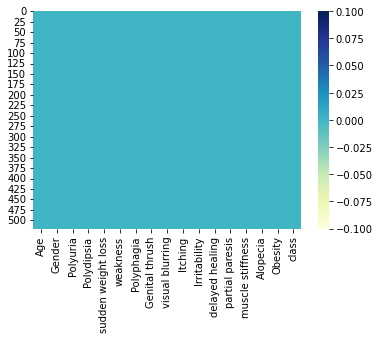

In [4]:
sns.heatmap(dfa.isnull(), cmap="YlGnBu")

In [5]:
dfa['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [6]:
dfa['Gender'] = dfa['Gender'].map({'Male':1,'Female':0})
dfa['class'] = dfa['class'].map({'Positive':1,'Negative':0})
dfa['Polyuria'] = dfa['Polyuria'].map({'Yes':1,'No':0})
dfa['Polydipsia'] = dfa['Polydipsia'].map({'Yes':1,'No':0})
dfa['sudden weight loss'] = dfa['sudden weight loss'].map({'Yes':1,'No':0})
dfa['weakness'] = dfa['weakness'].map({'Yes':1,'No':0})
dfa['Polyphagia'] = dfa['Polyphagia'].map({'Yes':1,'No':0})
dfa['Genital thrush'] = dfa['Genital thrush'].map({'Yes':1,'No':0})
dfa['visual blurring'] = dfa['visual blurring'].map({'Yes':1,'No':0})
dfa['Itching'] = dfa['Itching'].map({'Yes':1,'No':0})
dfa['Irritability'] = dfa['Irritability'].map({'Yes':1,'No':0})
dfa['delayed healing'] = dfa['delayed healing'].map({'Yes':1,'No':0})
dfa['partial paresis'] = dfa['partial paresis'].map({'Yes':1,'No':0})
dfa['muscle stiffness'] = dfa['muscle stiffness'].map({'Yes':1,'No':0})
dfa['Alopecia'] = dfa['Alopecia'].map({'Yes':1,'No':0})
dfa['Obesity'] = dfa['Obesity'].map({'Yes':1,'No':0})

In [7]:
corrdata = dfa.corr()

<AxesSubplot:>

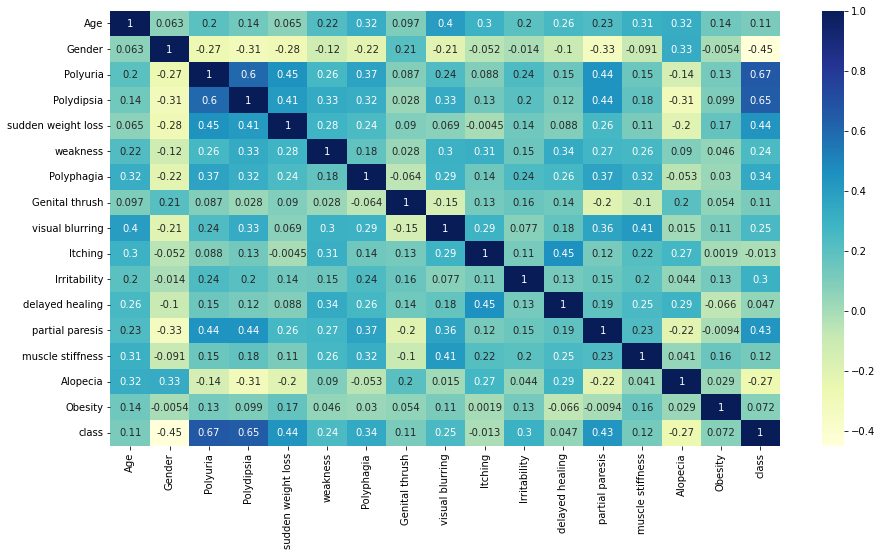

In [8]:
ax,fig = plt.subplots(figsize=(15,8))
sns.heatmap(corrdata,annot=True,cmap="YlGnBu")

D:\anacoda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

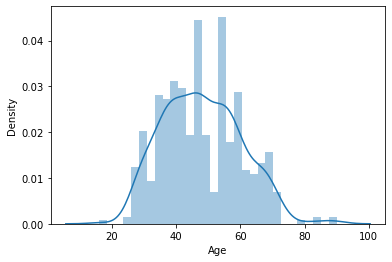

In [9]:
sns.distplot(dfa['Age'],bins=30)  

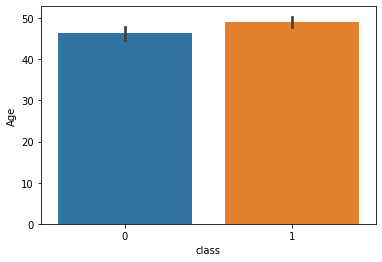

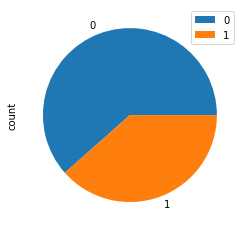

In [10]:
sns.barplot(x='class',y='Age',data=dfa)
ds = dfa['class'].value_counts().reset_index()
ds.columns = ['class', 'count']
plot=ds.plot.pie(y='count')


<AxesSubplot:xlabel='class', ylabel='count'>

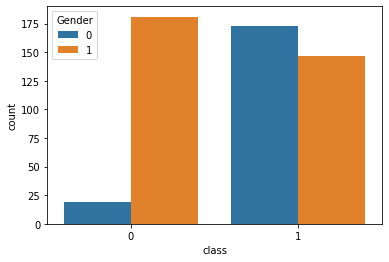

In [11]:
sns.countplot(x='class',data=dfa,hue='Gender')

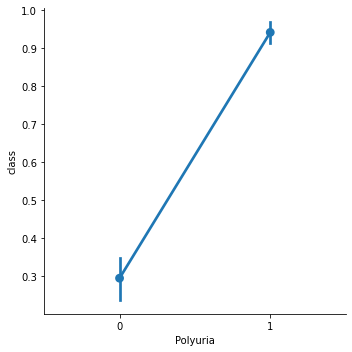

In [12]:
sns.catplot(x="Polyuria", y="class", kind="point", data=dfa)


<AxesSubplot:xlabel='Polydipsia', ylabel='class'>

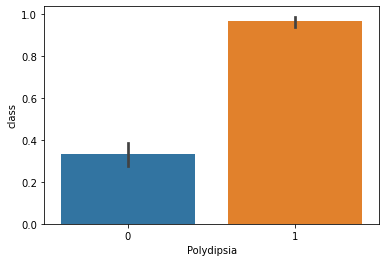

In [13]:
sns.barplot(x='Polydipsia',y='class',data=dfa)



<AxesSubplot:xlabel='class', ylabel='count'>

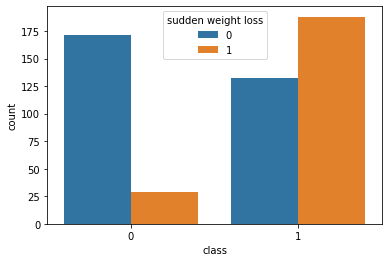

In [14]:
sns.countplot(x='class',data=dfa,hue='sudden weight loss')

<AxesSubplot:xlabel='class', ylabel='count'>

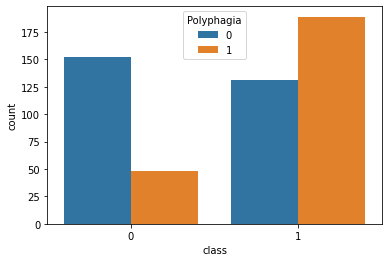

In [15]:
sns.countplot(x='class',data=dfa, hue='Polyphagia')

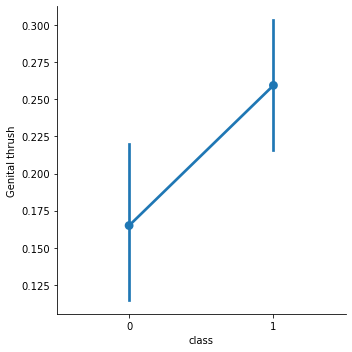

In [16]:
sns.catplot(x='class',y='Genital thrush',kind='point',data=dfa)

<AxesSubplot:xlabel='class', ylabel='partial paresis'>

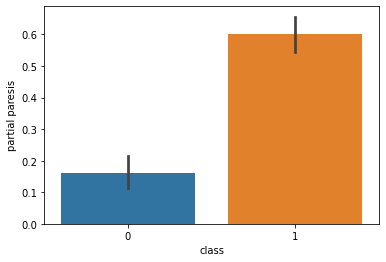

In [17]:
sns.barplot(x='class',y='partial paresis',data=dfa)

<AxesSubplot:xlabel='class', ylabel='Alopecia'>

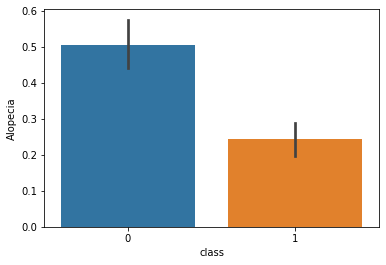

In [18]:
sns.barplot(x='class',y='Alopecia',data=dfa)

<AxesSubplot:xlabel='visual blurring', ylabel='class'>

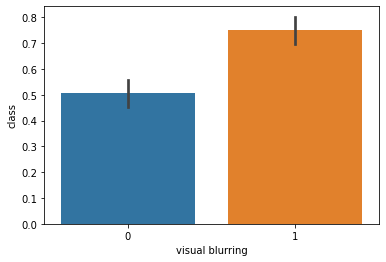

In [19]:
sns.barplot(x="visual blurring", y="class", data=dfa)

<AxesSubplot:xlabel='Itching', ylabel='class'>

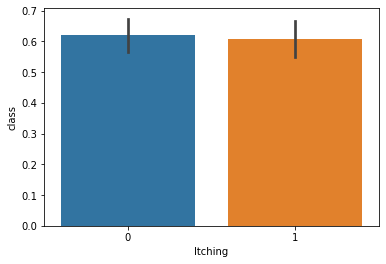

In [20]:
sns.barplot(x="Itching", y="class", data=dfa)

<AxesSubplot:xlabel='class', ylabel='Obesity'>

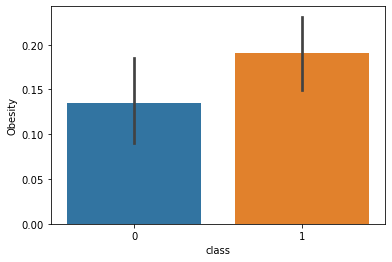

In [21]:
sns.barplot(x='class',y='Obesity',data=dfa)

<AxesSubplot:xlabel='Irritability', ylabel='class'>

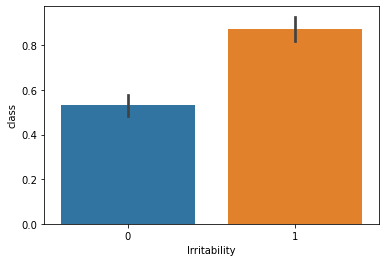

In [22]:
sns.barplot(x='Irritability',y='class',data=dfa)

In [23]:
X1 = dfa.iloc[:,0:-1]
y1 = dfa.iloc[:,-1]

X1.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X1,y1)

In [25]:
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X1.columns)
featurescores = pd.concat([dataset_cols,dataset_scores],axis=1)
featurescores.columns=['column','scores']

featurescores

,column,scores
0,Age,18.845767
1,Gender,38.747637
2,Polyuria,116.184593
3,Polydipsia,120.785515
4,sudden weight loss,57.749309
5,weakness,12.724262
6,Polyphagia,33.198418
7,Genital thrush,4.914009
8,visual blurring,18.124571
9,Itching,0.047826


<AxesSubplot:>

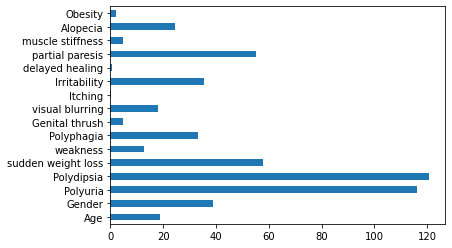

In [26]:
featureview=pd.Series(fit.scores_, index=X1.columns)
featureview.plot(kind='barh')

In [27]:
print(featurescores.nlargest(10,'scores'))

                column      scores
3           Polydipsia  120.785515
2             Polyuria  116.184593
4   sudden weight loss   57.749309
12     partial paresis   55.314286
1               Gender   38.747637
10        Irritability   35.334127
6           Polyphagia   33.198418
14            Alopecia   24.402793
0                  Age   18.845767
8      visual blurring   18.124571


In [28]:
from sklearn.feature_selection import VarianceThreshold
feature_high_variance = VarianceThreshold(threshold=(0.5*(1-0.5)))
falls=feature_high_variance.fit(X1)

In [29]:
dfa_scores1 = pd.DataFrame(falls.variances_)
dat1 = pd.DataFrame(X1.columns)

In [30]:
high_variance = pd.concat([dfa_scores1,dat1],axis=1)
high_variance.columns=['variance','cols']
high_variance[high_variance['variance']>0.2]

,variance,cols
0,147.374168,Age
1,0.232899,Gender
2,0.249985,Polyuria
3,0.247304,Polydipsia
4,0.243162,sudden weight loss
5,0.242511,weakness
6,0.248044,Polyphagia
8,0.247304,visual blurring
9,0.249819,Itching
11,0.248369,delayed healing


In [31]:
X = dfa[['Polydipsia','sudden weight loss','partial paresis','Irritability','Polyphagia','Age','visual blurring']]
y = dfa['class']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=5)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)



from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=lg, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 83.90 %
std is 6.18 %


In [34]:
pre=lg.predict(X_test)

In [35]:
logistic_regression=accuracy_score(pre,y_test)
print(accuracy_score(pre,y_test))
print(confusion_matrix(pre,y_test))

0.9134615384615384
[[36  3]
 [ 6 59]]


In [36]:
from sklearn.svm import SVC
sv=SVC(kernel='linear',random_state=0)
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=sv, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 81.24 %
std is 4.16 %


In [38]:
pre1=sv.predict(X_test)

In [39]:
svm_linear=accuracy_score(pre1,y_test)
print(accuracy_score(pre1,y_test))
print(confusion_matrix(pre1,y_test))

0.9230769230769231
[[37  3]
 [ 5 59]]


In [40]:
from sklearn.metrics import classification_report
print(classification_report(pre1,y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.95      0.92      0.94        64

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



In [41]:
from sklearn.svm import SVC
svrf=SVC(kernel='rbf',random_state=0)
svrf.fit(X_train,y_train)

SVC(random_state=0)

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svrf, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.38 %
std is 3.07 %


In [43]:
pre2=svrf.predict(X_test)

In [44]:
svm_rbf=accuracy_score(pre2,y_test)
print(accuracy_score(pre2,y_test))
print(confusion_matrix(pre2,y_test))

0.9038461538461539
[[39  7]
 [ 3 55]]


In [45]:
from sklearn.neighbors import KNeighborsClassifier
score=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    pre3=knn.predict(X_test)
    ans=accuracy_score(pre3,y_test)
    score.append(round(100*ans,2))
print(sorted(score,reverse=True)[:5])
knn=sorted(score,reverse=True)[:1]

[96.15, 95.19, 95.19, 94.23, 94.23]


In [46]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [47]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=gb, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 81.25 %
std is 4.79 %


In [48]:
pre4=gb.predict(X_test)

In [49]:
Naive_bayes_Gaussian_nb=accuracy_score(pre4,y_test)
print(accuracy_score(pre4,y_test))
print(confusion_matrix(pre4,y_test))

0.9326923076923077
[[38  3]
 [ 4 59]]


In [50]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=dc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 90.37 %
std is 2.46 %


In [52]:
pre5=dc.predict(X_test)

In [53]:
Decisiontrees_classifier=accuracy_score(pre5,y_test)
print(accuracy_score(pre5,y_test))
print(confusion_matrix(pre5,y_test))

0.9519230769230769
[[40  3]
 [ 2 59]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
estime=[]
for i in range(1,100):
    rc=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    rc.fit(X_train,y_train)

In [55]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rc, X=X_train ,y=y_train,cv=10)
print("accuracy is {:.2f} %".format(accuracies.mean()*100))
print("std is {:.2f} %".format(accuracies.std()*100))

accuracy is 91.34 %
std is 2.47 %


In [56]:
pre6 = rc.predict(X_test)

In [57]:
Random_forest=accuracy_score(pre6,y_test)
print(accuracy_score(pre6,y_test))
print(confusion_matrix(pre6,y_test))

0.9519230769230769
[[39  2]
 [ 3 60]]


In [58]:
print('Logistic regression:',logistic_regression)
print('svmlinear:',svm_linear)
print('svmrbf:',svm_rbf)
print('knn:',knn)
print('naive bayes:',Naive_bayes_Gaussian_nb)
print('Decision tress:',Decisiontrees_classifier)
print('Random forest:',Random_forest)

Logistic regression: 0.9134615384615384
svmlinear: 0.9230769230769231
svmrbf: 0.9038461538461539
knn: [96.15]
naive bayes: 0.9326923076923077
Decision tress: 0.9519230769230769
Random forest: 0.9519230769230769
